In [23]:
# import libraries
import os
from pathlib import Path
import pandas as pd
import urllib
import json
import zipfile
from zipfile import ZipFile
from openpyxl import Workbook
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# clear folder from previous exercises leaving only trip data zip file
dir_name = r"C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data"
folder = os.listdir(dir_name)

for item in folder:
    if item.endswith(".csv") or item.endswith(".txt"):
        os.remove(os.path.join(dir_name, item))

In [25]:
# assign path to data folder
data_path = r"C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data"

# file name to download
file = "OpenDataDC_Taxi_2023.zip"

# establish file path
fullfilename = os.path.join(data_path, file)

# assign ZIP file to variable
items = zipfile.ZipFile(fullfilename)

# show files in ZIP
print(items.namelist())

# opening ZIP file in read mode
with zipfile.ZipFile(fullfilename, "r") as file:

    # extract all files inside the ZIP file
    file.extractall(data_path)

['README_DC_Taxicab_trip.txt', 'taxi_202301.csv', 'taxi_202302.csv', 'taxi_202303.csv', 'taxi_202304.csv', 'taxi_202305.csv', 'taxi_202306.csv', 'taxi_202307.csv', 'taxi_202308.csv', 'taxi_202309.csv', 'taxi_202310.csv', 'taxi_202311.csv', 'taxi_202312.csv']


In [ ]:
# load monthly files into a single df and visualize process using glob library
# data types indicated to improve performance and columns selected to consolidate df
import glob

import glob
all_dfs = []
for one_filename in glob.glob(r'C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi*.csv'):
    print(f'Loading {one_filename}')
    new_df= pd.read_csv(one_filename,
                 usecols=['OBJECTID', 'ORIGINDATETIME_TR', 'DESTINATIONDATETIME_TR', 'ORIGINZIP', 'DESTINATIONZIP', 'MILEAGE', 'DURATION']) 
    all_dfs.append(new_df)

len(all_dfs)

Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202301.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202302.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202303.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202304.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202305.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202306.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents

12

In [27]:
# combine multiple dataframes into one and preview data
taxi_trips = pd.concat(all_dfs)

rows, columns = taxi_trips.shape
print('rows: {:,}\ncolumns: {}'.format(rows, columns))

taxi_trips

rows: 3,092,555
columns: 7


,OBJECTID,ORIGINZIP,DESTINATIONZIP,MILEAGE,DURATION,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR
0,1,2DA,22202,5.76000,852.0,01/01/2023 00:00,01/01/2023 00:00
1,2,20011,20011,3.11000,650.0,01/01/2023 00:00,01/01/2023 00:00
2,3,20001,20007,4.80000,539.0,01/01/2023 00:00,01/01/2023 00:00
3,4,20005,20024,2.68000,1187.0,01/01/2023 00:00,01/01/2023 00:00
4,5,20001,20002,5.76000,876.0,01/01/2023 00:00,01/01/2023 00:00
...,...,...,...,...,...,...,...
199303,199304,20004,20011,9.63000,3024.0,12/31/2023 23:00,01/01/2024 00:00
199304,199305,20002,20002,0.00000,106.0,12/31/2023 23:00,12/31/2023 23:00
199305,199306,20002,20037,2.73000,1078.0,12/31/2023 23:00,12/31/2023 23:00
199306,199307,20002,20010,3.54000,1269.0,12/31/2023 23:00,01/01/2024 00:00


In [28]:
# convert pickup timestamp to datetime column and add month column
taxi_trips['pickup_dt'] = pd.to_datetime(taxi_trips['ORIGINDATETIME_TR'])  

taxi_trips.dtypes

OBJECTID                           int64
ORIGINZIP                         object
DESTINATIONZIP                    object
MILEAGE                          float64
DURATION                         float64
ORIGINDATETIME_TR                 object
DESTINATIONDATETIME_TR            object
pickup_dt                 datetime64[ns]
dtype: object

In [ ]:
# convert UTC date time column to local time zone
taxi_trips["pickup_est"] = (
    taxi_trips["pickup_dt"].dt.tz_localize("UTC").dt.tz_convert("US/Eastern")
)
# extract hour, weekday name, and weekday number in local time zone
taxi_trips["hour"] = pd.DatetimeIndex(taxi_trips["pickup_est"]).hour
taxi_trips["weekday_name"] = pd.DatetimeIndex(taxi_trips["pickup_est"]).day_name()
taxi_trips["weekday_num"] = taxi_trips["pickup_est"].dt.dayofweek
taxi_trips["month"] = pd.DatetimeIndex(taxi_trips["pickup_est"]).month

taxi_trips.head()

,OBJECTID,ORIGINZIP,DESTINATIONZIP,MILEAGE,DURATION,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,pickup_dt,pickup_est,hour,weekday_name,weekday_num,month
0,1,2DA,22202,5.76,852.0,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12
1,2,20011,20011,3.11,650.0,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12
2,3,20001,20007,4.80,539.0,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12
3,4,20005,20024,2.68,1187.0,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12
4,5,20001,20002,5.76,876.0,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12


In [30]:
# group by month
trips_monthly = (
    taxi_trips
    .groupby('month')[['OBJECTID']]
    .count()
    .rename(columns={'OBJECTID': 'count'})
    .reset_index()
)

trips_monthly.head()

,month,count
0,1,210460
1,2,243248
2,3,333428
3,4,316407
4,5,322195


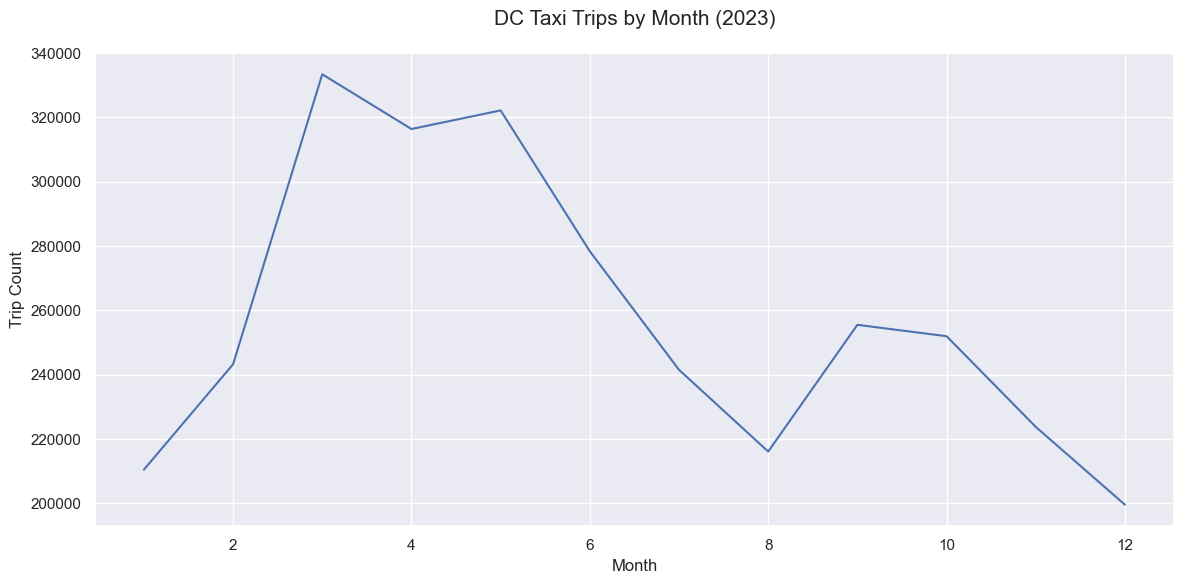

In [31]:
# plot monthly trip counts
%matplotlib inline
sns.set(color_codes=True)

fig, ax = plt.subplots(figsize=(12,6))

trips_monthly.plot(
    x='month', 
    y='count', 
    legend=False, 
    ax=ax
).set_title(
    'DC Taxi Trips by Month (2023)',
    pad=20, fontsize=15)


plt.xlabel('Month', fontsize=12)
plt.ylabel('Trip Count', fontsize=12)

plt.tight_layout()

In [ ]:
# transform data to visualize hourly trips by weekday
# create pivot table dataframe for graphing
table = pd.pivot_table(
    taxi_trips,
    values = 'OBJECTID', 
    index=['hour'],  
    columns=['weekday_name', 'weekday_num'], 
    sort=['weekday_num'],
    aggfunc='count'
)

table.head(24)


weekday_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
weekday_num,4,0,5,6,3,1,2
hour,,,,,,,
0,5409,4393,7798,8014,4252,3766,3741
1,3417,2567,6117,6429,2513,2156,2306
2,2645,2045,4944,5263,2233,1785,2080
3,2639,2133,3541,3901,2888,2392,2623
4,4593,3522,3448,3424,4892,3719,4363
5,7558,5792,5310,4468,7700,5785,7161
6,10228,7943,7265,6346,10844,8853,10124
7,15457,13821,8661,7868,18435,16866,18772


In [33]:
# sort columns by weekday ascending
sorted_table = table.sort_index(axis='columns', level='weekday_num')

sorted_table.head()

weekday_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
weekday_num,0,1,2,3,4,5,6
hour,,,,,,,
0,4393,3766,3741,4252,5409,7798,8014
1,2567,2156,2306,2513,3417,6117,6429
2,2045,1785,2080,2233,2645,4944,5263
3,2133,2392,2623,2888,2639,3541,3901
4,3522,3719,4363,4892,4593,3448,3424


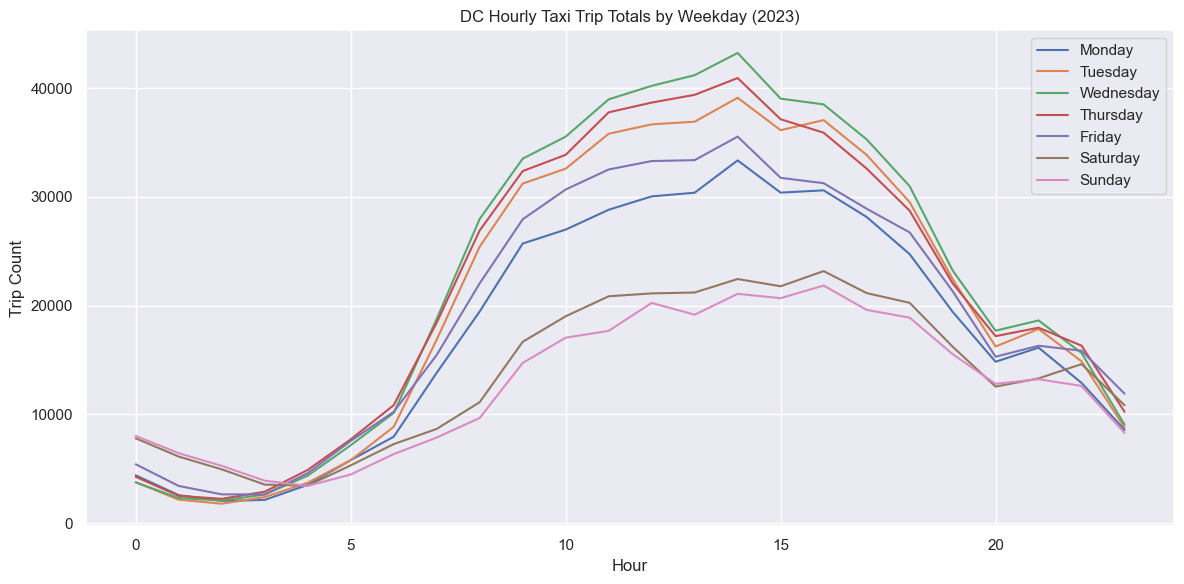

In [34]:
# plot line graph with hourly trip totals grouped by weekday
fig, ax = plt.subplots(figsize=(12,6))

sorted_table.plot(ax=ax).set_title(
    'DC Hourly Taxi Trip Totals by Weekday (2023)')

plt.xlabel('Hour', fontsize=12)
plt.ylabel('Trip Count', fontsize=12)

# provide column name aliases
l = plt.legend()
l.get_texts()[0].set_text('Monday')
l.get_texts()[1].set_text('Tuesday')
l.get_texts()[2].set_text('Wednesday')
l.get_texts()[3].set_text('Thursday')
l.get_texts()[4].set_text('Friday')
l.get_texts()[5].set_text('Saturday')
l.get_texts()[6].set_text('Sunday')

plt.tight_layout()

In [35]:
# disable chained assignment warning
#pd.options.mode.chained_assignment = 'warn'
pd.options.mode.chained_assignment = None

In [36]:
# remove outliers and nulls
trips_speed = taxi_trips.loc[ 
    (taxi_trips["DURATION"] >= 30.0)
    & (taxi_trips["MILEAGE"] < 90)
    & (taxi_trips["MILEAGE"] != 0)
]

In [37]:
# calculate average trip speed
trips_speed["avg_speed"] = (trips_speed["MILEAGE"] / trips_speed["DURATION"]) * 60 * 60

trips_speed.head()

,OBJECTID,ORIGINZIP,DESTINATIONZIP,MILEAGE,DURATION,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,pickup_dt,pickup_est,hour,weekday_name,weekday_num,month,avg_speed
0,1,2DA,22202,5.76,852.0,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12,24.338028
1,2,20011,20011,3.11,650.0,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12,17.224615
2,3,20001,20007,4.80,539.0,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12,32.059369
3,4,20005,20024,2.68,1187.0,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12,8.128054
4,5,20001,20002,5.76,876.0,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,2022-12-31 19:00:00-05:00,19,Saturday,5,12,23.671233


In [38]:
# calculate hourly speed average
trips_speed_avg = trips_speed.groupby(['hour'])['avg_speed'].mean() \
    .reset_index() \
    .rename(columns={'avg_speed':'avg_hourly_speed'})

trips_speed_avg

,hour,avg_hourly_speed
0,0,37.880667
1,1,35.714511
2,2,34.410050
3,3,25.864821
4,4,26.604161
5,5,28.306873
6,6,28.909195
7,7,23.601315
8,8,19.455917
9,9,19.208272


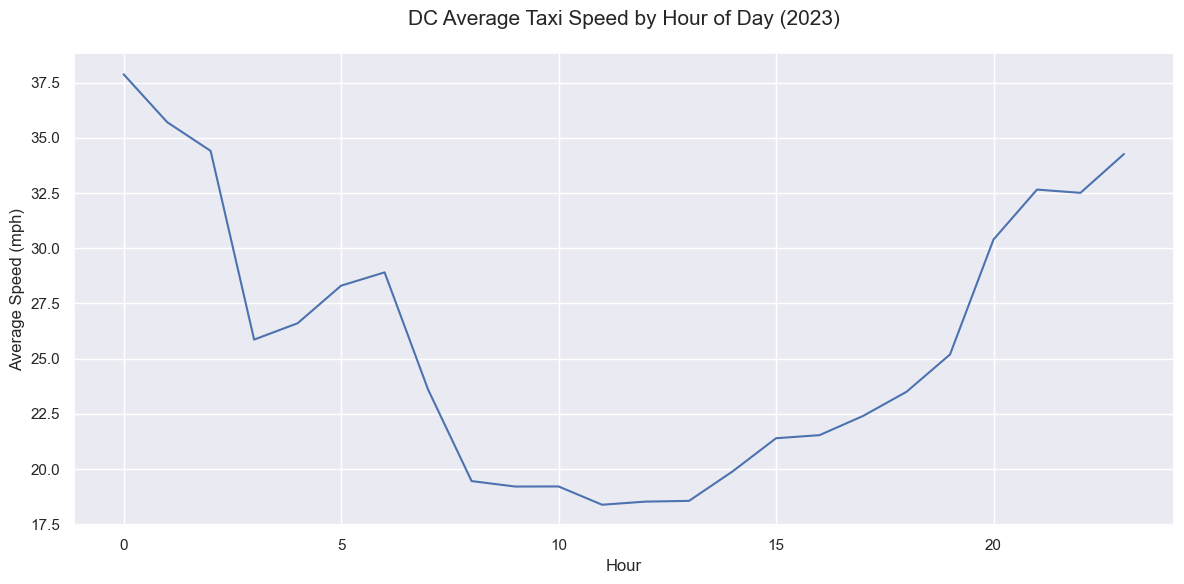

In [39]:
# plot average speed by hour of day
%matplotlib inline
sns.set(color_codes=True)

fig, ax = plt.subplots(figsize=(12,6))

trips_speed_avg.plot(
    x='hour', 
    y='avg_hourly_speed', 
    legend=False, 
    ax=ax
).set_title(
    'DC Average Taxi Speed by Hour of Day (2023)',
    pad=20, fontsize=15)

plt.xlabel('Hour', fontsize=12)
plt.ylabel('Average Speed (mph)', fontsize=12)

plt.tight_layout()

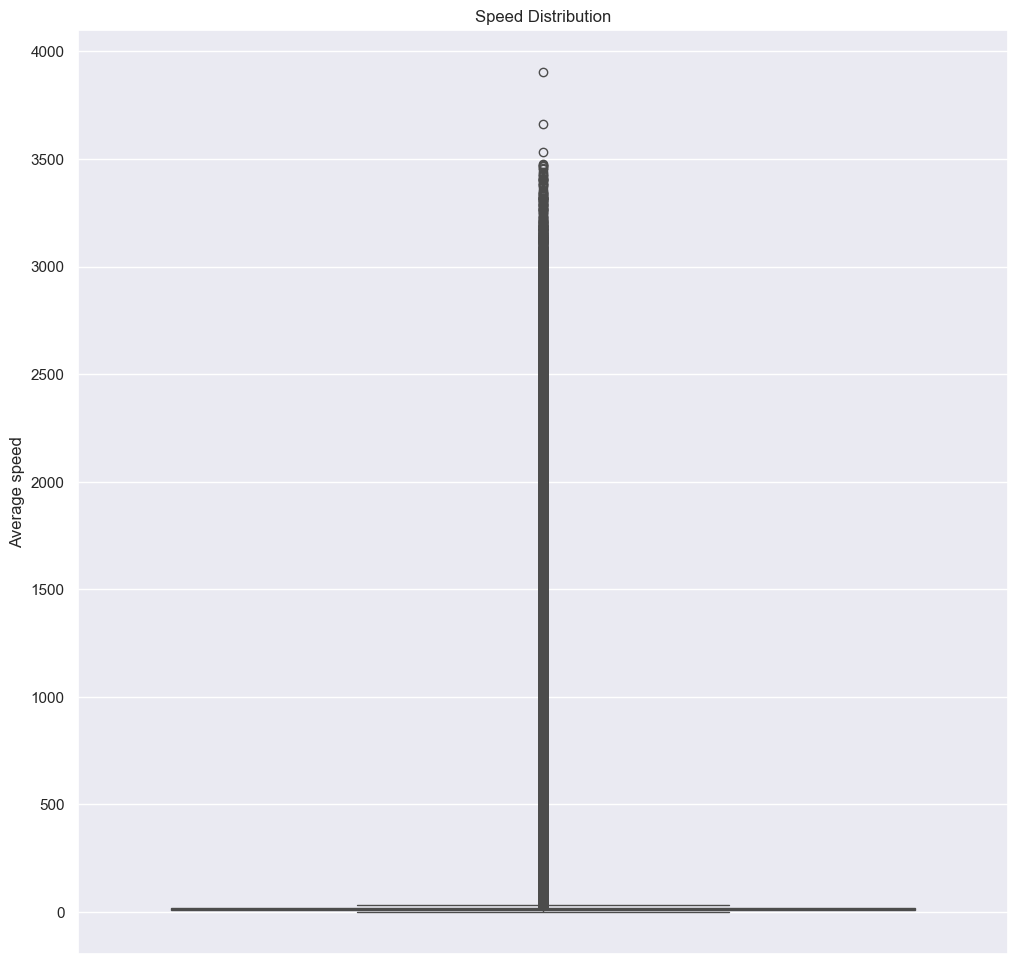

In [ ]:
# check average speed distribution for outliers
plt.figure(figsize=(12, 12))
sns.boxplot(trips_speed.avg_speed)
plt.title("Speed Distribution")
plt.ylabel("Average Speed")
plt.show()

C:\Users\Guest.Guest\AppData\Local\Temp\ipykernel_10472\3195776046.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trips_speed_adj.avg_speed.groupby(pd.cut(trips_speed_adj.avg_speed, np.arange(0,65,10))).count().plot(kind = 'barh',figsize = (12,6))


Text(0.5, 1.0, 'Speed')

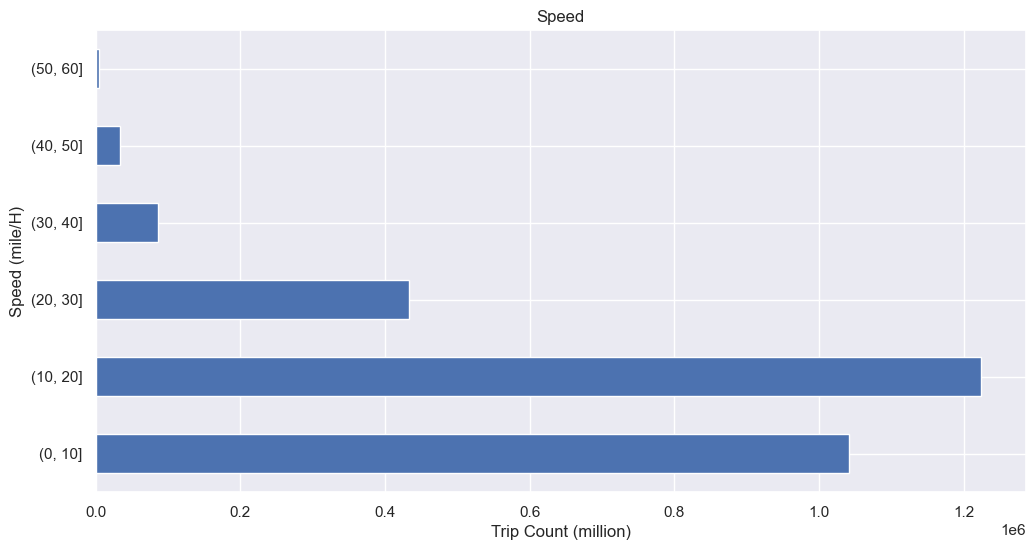

In [41]:
# remove trips with avgerage speed at or over 70 mph, likely invalid speed data
trips_speed_adj = trips_speed[trips_speed.avg_speed <= 70]

# map speed frequency distribution using cleaned data
trips_speed_adj.avg_speed.groupby(pd.cut(trips_speed_adj.avg_speed, np.arange(0,65,10))).count().plot(kind = 'barh',figsize = (12,6))

plt.xlabel('Trip Count (million)')
plt.ylabel('Speed (mile/H)')
plt.title('Speed')

In [42]:
# show avgerage speed by hour using cleaned data
trips_speed_avg_adj = trips_speed_adj.groupby(['hour'])['avg_speed'].mean() \
    .reset_index() \
    .rename(columns={'avg_speed':'avg_hourly_speed'})

trips_speed_avg_adj

,hour,avg_hourly_speed
0,0,17.494619
1,1,16.312532
2,2,16.124739
3,3,17.167127
4,4,18.920037
5,5,18.959971
6,6,17.611220
7,7,15.033153
8,8,13.123239
9,9,13.886351


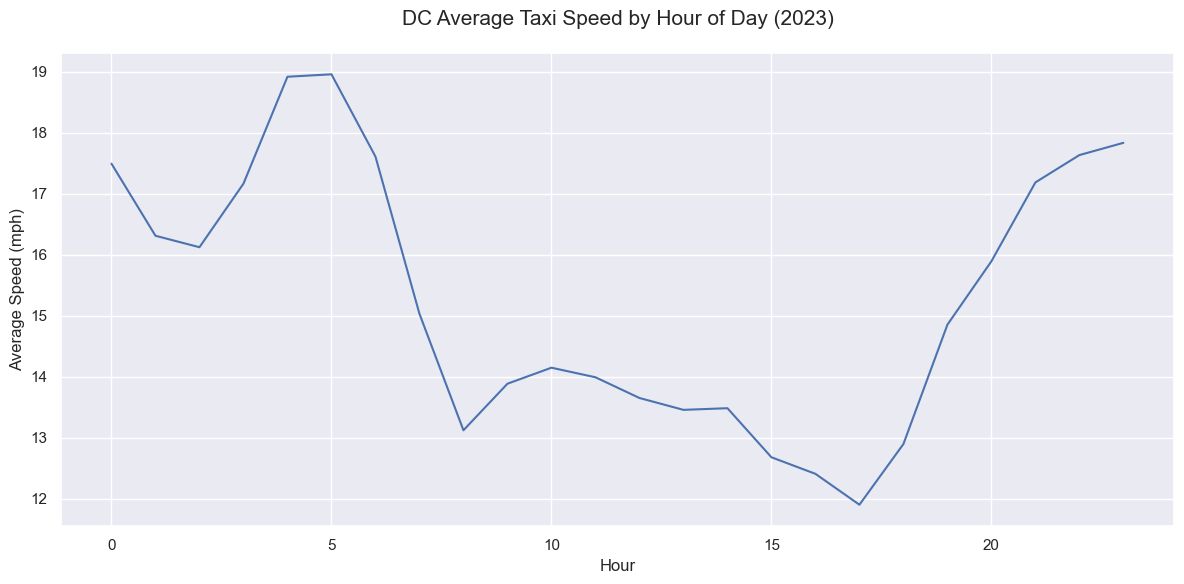

In [43]:
# plot average speed by hour of day using cleaned data
%matplotlib inline
sns.set(color_codes=True)

fig, ax = plt.subplots(figsize=(12,6))

trips_speed_avg_adj.plot(
    x='hour', 
    y='avg_hourly_speed', 
    legend=False, 
    ax=ax
).set_title(
    'DC Average Taxi Speed by Hour of Day (2023)',
    pad=20, fontsize=15)

plt.xlabel('Hour', fontsize=12)
plt.ylabel('Average Speed (mph)', fontsize=12)

plt.tight_layout()